In [5]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc
%matplotlib inline

ImportError: No module named 'graphviz'

# SPOTIFY SONG ATTRIBUTE EDA 
- import dataset
- do exploratory data analysis EDA to visualize the data
- train a classifier (Decision Tree)
- predict target using trained classifier

In [6]:
!wget -N https://cdn.discordapp.com/attachments/599120338546196482/599135889964138515/data.csv
data = pd.read_csv('./data.csv',sep =',')
data.describe()
data.head()
data.shape

--2019-07-13 08:53:08--  https://cdn.discordapp.com/attachments/599120338546196482/599135889964138515/data.csv
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.134.233, 162.159.129.233, 162.159.133.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.134.233|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘data.csv’ not modified on server. Omitting download.



(2017, 17)

In [7]:
train, test = train_test_split(data, test_size = 0.15) #15% dataset used for testing, remaining 75% for training
print("Training size : {} ; Test Size = {} ".format(len(train), len(test)))
train.shape

Training size : 1714 ; Test Size = 303 


(1714, 17)

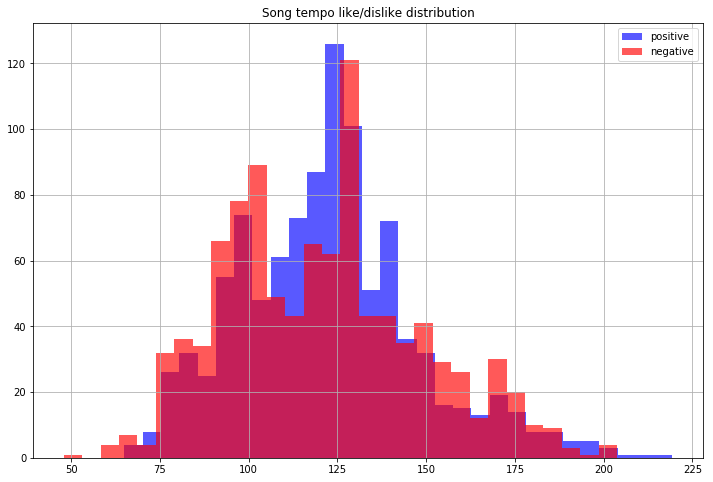

In [8]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

fig = plt.figure(figsize=(12,8))
plt.title("Song tempo like/dislike distribution")
pos_tempo.hist(alpha = 0.65, bins = 30, label = 'positive', color = ['Blue'])
neg_tempo.hist(alpha = 0.65, bins = 30, label = 'negative', color = ['Red'])
plt.legend(loc = "upper right")

In [9]:
pos_liveness = data[data['target'] == 1]['liveness']
neg_liveness = data[data['target'] == 0]['liveness']

pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']

pos_danceability = data[data['target'] == 1]['danceability']
neg_danceability = data[data['target'] == 0]['danceability']

pos_duration_ms = data[data['target'] == 1]['duration_ms']
neg_duration_ms = data[data['target'] == 0]['duration_ms']

pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']

pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']

pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']

pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']

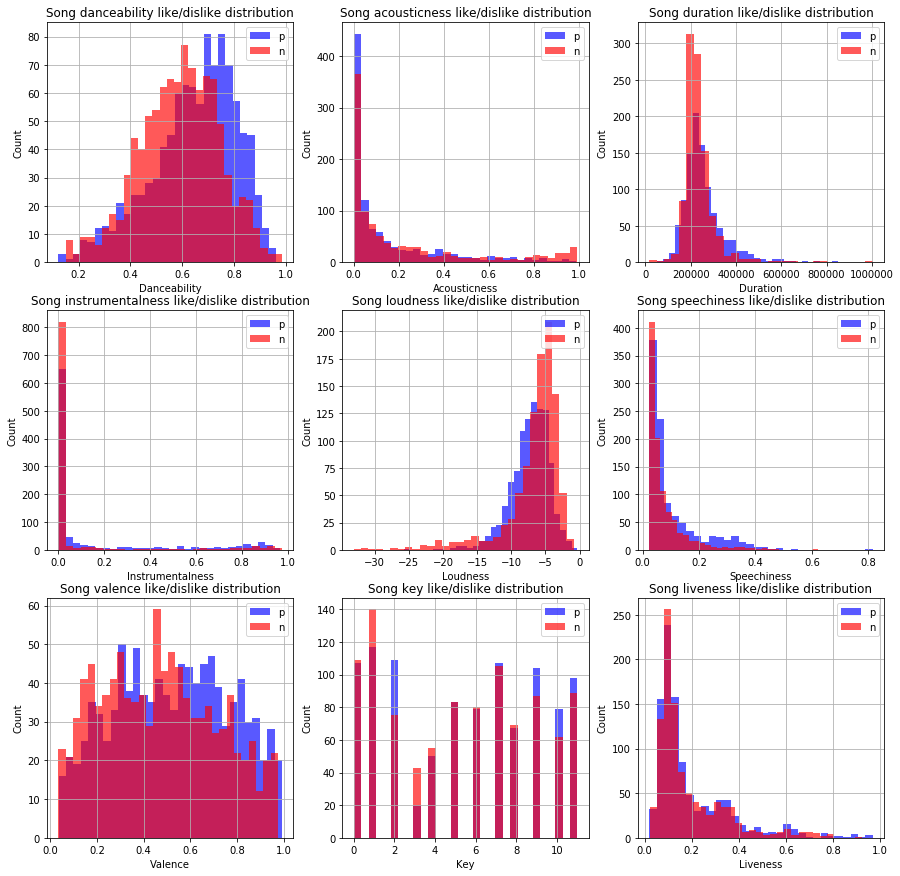

In [10]:
fig2 = plt.figure(figsize=(15,15))

#danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song danceability like/dislike distribution')
pos_danceability.hist(alpha = 0.65, bins = 30, label = 'p', color = ['Blue'])
neg_danceability.hist(alpha = 0.65, bins = 30, label = 'n', color = ['Red'])
plt.legend(loc = "upper right")

#acousticness
ax4 = fig2.add_subplot(332)
ax4.set_xlabel('Acousticness')
ax4.set_ylabel('Count')
ax4.set_title('Song acousticness like/dislike distribution')
pos_acousticness.hist(alpha = 0.65, bins = 30, label = 'p', color = ['Blue'])
neg_acousticness.hist(alpha = 0.65, bins = 30, label = 'n', color = ['Red'])
plt.legend(loc = "upper right")

#duration_ms
ax5 = fig2.add_subplot(333)
ax5.set_xlabel('Duration')
ax5.set_ylabel('Count')
ax5.set_title('Song duration like/dislike distribution')
pos_duration_ms.hist(alpha = 0.65, bins = 30, label = 'p', color = ['Blue'])
neg_duration_ms.hist(alpha = 0.65, bins = 30, label = 'n', color = ['Red'])
plt.legend(loc = "upper right")

#instrumentalness
ax6 = fig2.add_subplot(334)
ax6.set_xlabel('Instrumentalness')
ax6.set_ylabel('Count')
ax6.set_title('Song instrumentalness like/dislike distribution')
pos_instrumentalness.hist(alpha = 0.65, bins = 30, label = 'p', color = ['Blue'])
neg_instrumentalness.hist(alpha = 0.65, bins = 30, label = 'n', color = ['Red'])
plt.legend(loc = "upper right")

#loudness
ax7 = fig2.add_subplot(335)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song loudness like/dislike distribution')
pos_loudness.hist(alpha = 0.65, bins = 30, label = 'p', color = ['Blue'])
neg_loudness.hist(alpha = 0.65, bins = 30, label = 'n', color = ['Red'])
plt.legend(loc = "upper right")

#Speechiness
ax8 = fig2.add_subplot(336)
ax8.set_xlabel('Speechiness')
ax8.set_ylabel('Count')
ax8.set_title('Song speechiness like/dislike distribution')
pos_speechiness.hist(alpha = 0.65, bins = 30, label = 'p', color = ['Blue'])
neg_speechiness.hist(alpha = 0.65, bins = 30, label = 'n', color = ['Red'])
plt.legend(loc = "upper right")

#valence
ax9 = fig2.add_subplot(337)
ax9.set_xlabel('Valence')
ax9.set_ylabel('Count')
ax9.set_title('Song valence like/dislike distribution')
pos_valence.hist(alpha = 0.65, bins = 30, label = 'p', color = ['Blue'])
neg_valence.hist(alpha = 0.65, bins = 30, label = 'n', color = ['Red'])
plt.legend(loc = "upper right")

#key
ax10 = fig2.add_subplot(338)
ax10.set_xlabel('Key')
ax10.set_ylabel('Count')
ax10.set_title('Song key like/dislike distribution')
pos_key.hist(alpha = 0.65, bins = 30, label = 'p', color = ['Blue'])
neg_key.hist(alpha = 0.65, bins = 30, label = 'n', color = ['Red'])
plt.legend(loc = "upper right")

#liveness
ax11 = fig2.add_subplot(339)
ax11.set_xlabel('Liveness')
ax11.set_ylabel('Count')
ax11.set_title('Song liveness like/dislike distribution')
pos_liveness.hist(alpha = 0.65, bins = 30, label = 'p', color = ['Blue'])
neg_liveness.hist(alpha = 0.65, bins = 30, label = 'n', color = ['Red'])
plt.legend(loc = "upper right")


In [11]:
c = DecisionTreeClassifier(min_samples_split = 100)

In [12]:
features = ["danceability","loudness","valence","energy","instrumentalness","acousticness","key","speechiness","duration_ms"]

In [13]:
x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]

In [14]:
dt = c.fit(x_train,y_train)